In [174]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats.distributions import norm
from scipy.stats.distributions import beta
from scipy.stats.distributions import uniform
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

# Reading From csv
delta_values = pd.read_csv('delta_values.csv', index_col=0)
display(delta_values.head())

# Extracting required deltas. Need two deltas, one with 50 % confidence interval and other with 95.
deltas = {}

for n in N:
    df = delta_values[delta_values.loc[:,"N"] == n]
    delta_50 = delta_values.iloc[(df["Alpha"]- 0.5).abs().argsort()[:1], 1].values[0]
    delta_95 = delta_values.iloc[(df["Alpha"]- 0.95).abs().argsort()[:1], 1].values[0]
    
    deltas[n] = [delta_50, delta_95]

print(deltas)

N = [100, 50]
N = [50]


,N,Delta,Alpha
0,50,0.500000,0.0
1,50,0.500501,0.0
2,50,0.501001,0.0
3,50,0.501502,0.0
4,50,0.502002,0.0


{50: [0.94594594594594605, 0.99649649649649641]}


In [190]:
# CDF experiment
trials = 1000
N_values = N
# dist = norm(loc=0.5, scale=0.1)
dist = uniform(0, 1)

for n in N_values:
    # Values of delta
    samples = dist.rvs(size=(trials, n))
    samples = np.square(samples)
    ord_stats = np.sort(samples)       
    
    delta_50 = float(deltas[n][0])
    delta_95 = float(deltas[n][1])    
    
    # Preparing estimated cdf bounds upper and lower both.
    u_limit = np.array([beta.ppf(q=(1+delta_95)/2.0, a=i, b=n-i+1) for i in range(1, int(n/2)+1)]+
                       [beta.ppf(q=(1+delta_50)/2.0, a=i, b=n-i+1) for i in range(int(n/2)+1, n+1)])
    
    l_limit = np.array([beta.ppf(q=(1-delta_95)/2.0, a=i, b=n-i+1) for i in range(1, int(n/2)+1)]+
                       [beta.ppf(q=(1-delta_50)/2.0, a=i, b=n-i+1) for i in range(int(n/2)+1, n+1)])

    cdf = np.zeros((trials, n))
    for t in range(10):
        print("orde stat", ord_stats[t])
        ecdf =  ECDF(samples[t])
        cdf[t] =  ecdf(np.linspace(0, 1, n))
    
#     violation_counter = 0.0

#     for t in range(trials):
#         for i, cdf_value in enumerate(ord_stats_cdf[t,:]):
#             if cdf_value > u_limit[i] or cdf_value < l_limit[i]:
#                 violation_counter += 1.0
#                 break

#     est_alpha_prime = violation_counter / trials
#     obs_list.append([N, delta, 1.0 - est_alpha_prime])



orde stat [  1.84926585e-04   2.79320918e-04   6.43051104e-03   1.07901384e-02
   1.08864416e-02   1.15214109e-02   1.81365613e-02   2.03802913e-02
   3.50516783e-02   3.55901599e-02   4.00273549e-02   4.46697929e-02
   4.88851544e-02   7.86934750e-02   1.07550734e-01   1.15980237e-01
   1.37166309e-01   1.45836294e-01   1.50155096e-01   1.65085598e-01
   1.66920349e-01   1.70420584e-01   1.71340971e-01   2.10856438e-01
   2.28237908e-01   2.42565217e-01   2.52705285e-01   2.65547662e-01
   2.73043326e-01   3.00560853e-01   3.31658066e-01   3.45962632e-01
   4.41045415e-01   4.57424809e-01   4.66264533e-01   4.73121790e-01
   5.20747446e-01   5.52114159e-01   5.92920342e-01   6.19168879e-01
   6.56858782e-01   6.80263115e-01   7.07273419e-01   7.15210757e-01
   7.65214360e-01   7.82382847e-01   8.32044719e-01   8.36856646e-01
   8.39010262e-01   8.98725025e-01]
orde stat [ 0.00178467  0.00202435  0.00286427  0.00741546  0.01205825  0.01383825
  0.02050169  0.03914091  0.03926022  0.054

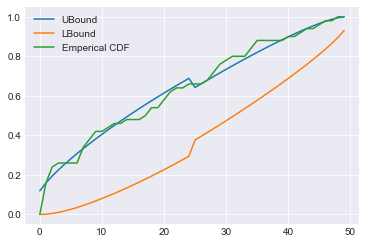

In [193]:
# Visualizing the bounds and one of the cdfs.
sns.set_style("darkgrid")
plt.plot(np.arange(50), u_limit, label="UBound")
plt.plot(np.arange(50), l_limit, label="LBound")
plt.plot(np.arange(50), cdf[6], label="Emperical CDF")
plt.legend(loc="best")




In [184]:
# Calculating violations of the cdf on sample square.

print(cdf[1])



[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [ ]:
samples = normal_dist.rvs(100)
normal_dist.ppf


import numpy as np
import scikits.statsmodels as sm
import matplotlib.pyplot as plt

sample = np.random.uniform(0, 1, 50)
ecdf = sm.tools.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)